### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("C:/Users/S_The/Downloads/TravelInsurancePrediction.csv")
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)

### Exploratory Data Analysis

In [4]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [5]:
df.TravelInsurance.value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

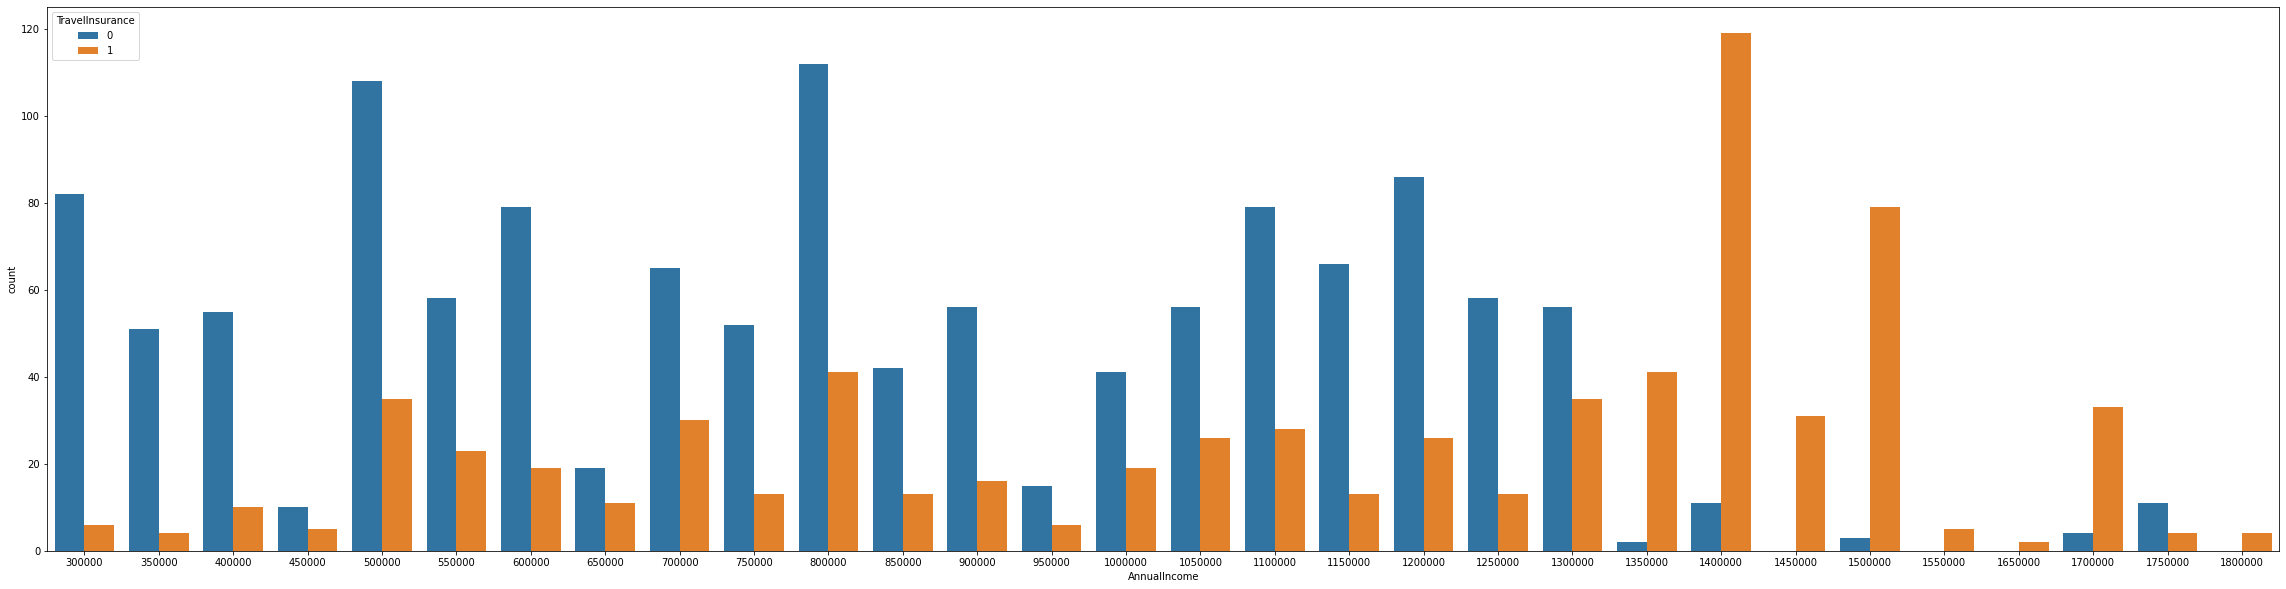

In [6]:
plt.figure(figsize=(40,10))
sns.countplot('AnnualIncome',hue='TravelInsurance',data=df)
plt.show()

We can see that people with annual income greater that 1350000 have a strong tendention to take a travel insurance. We will use this info later for feature engineering.

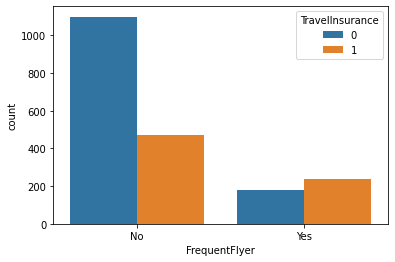

In [7]:
sns.countplot('FrequentFlyer',hue='TravelInsurance',data=df)
plt.show()

Frequent flyers are more likely to take travel insurance.

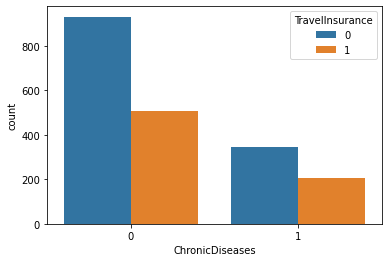

In [8]:
sns.countplot('ChronicDiseases',hue='TravelInsurance',data=df)
plt.show()

"ChronicDiseases" doesnt seem to have much inpact on the target.

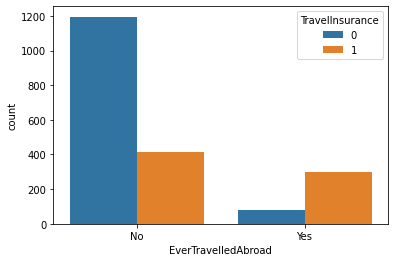

In [9]:
sns.countplot('EverTravelledAbroad',hue='TravelInsurance',data=df)
plt.show()

People who has travelled abroad are more likely to take travel insurance.

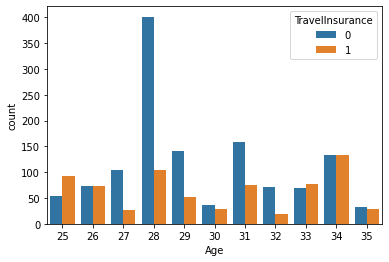

In [10]:
sns.countplot('Age',hue='TravelInsurance',data=df)
plt.show()

people older that 33 usually take travel insurance. Take that for feature engineering.

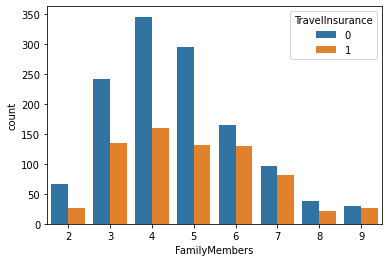

In [11]:
sns.countplot('FamilyMembers',hue='TravelInsurance',data=df)
plt.show()

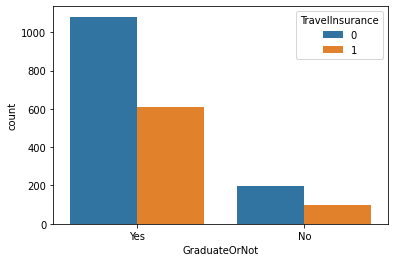

In [12]:
sns.countplot('GraduateOrNot',hue='TravelInsurance',data=df)
plt.show()

## Feature engineering

In [13]:
# Creating a numpy array of Age values 
x = df['Age'].values
# List of new categories
cat = [0, 1]
# New column based on certain conditions
df['AgeCategory']=np.select([x<=32, x>32],cat)

In [14]:
x = df['AnnualIncome'].values
cat = [0, 1]
df['AnnualCategory']=np.select([x<=1300000, x>1300000],cat)

**Replace words with 0/1 categories.**

In [15]:
df['Employment Type'].replace({'Private Sector/Self Employed':0, 'Government Sector':1},inplace=True)
df['GraduateOrNot'].replace({'No':0, 'Yes':1},inplace=True)
df['FrequentFlyer'].replace({'No':0, 'Yes':1},inplace=True)
df['EverTravelledAbroad'].replace({'No':0, 'Yes':1},inplace=True)

*We no more in need of those columns:*

In [16]:
df_use = df.drop(columns=["AnnualIncome", "Age"])

In [17]:
df_use.head()

,Employment Type,GraduateOrNot,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AgeCategory,AnnualCategory
0,1,1,6,1,0,0,0,0,0
1,0,1,7,0,0,0,0,0,0
2,0,1,4,1,0,0,1,1,0
3,0,1,3,1,0,0,0,0,0
4,0,1,8,1,1,0,0,0,0


### Data preprocessing

In [18]:
X = df_use.drop(columns=["TravelInsurance"])
y = df_use.TravelInsurance

In [19]:
X_imbalanced = np.vstack((X[y == 1], X[y == 0][:30]))
y_imbalanced = np.hstack((y[y == 1], y[y == 0][:30]))

In [20]:
from sklearn.utils import resample

# Create oversampled training data set for minority class
X_oversampled, y_oversampled = resample(X_imbalanced[y_imbalanced == 0],
                                        y_imbalanced[y_imbalanced == 0],
                                        replace=True,
                                        n_samples=X_imbalanced[y_imbalanced == 1].shape[0],
                                        random_state=123)

# Append the oversampled minority class to training data and related labels
X_balanced = np.vstack((X[y == 1], X_oversampled))
y_balanced = np.hstack((y[y == 1], y_oversampled))

### MODEL TRAINING

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.33, random_state=42)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
parameters = {'alpha': (0.1, 10), 'max_depth': (5, 10), 'learning_rate': (0.1, 1)}
gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, random_state=0)
model = gbc.fit(X_train, y_train)

In [27]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, f1_score, precision_score, recall_score

### XGBoost Classifier

In [31]:
xgb =  GradientBoostingClassifier
y_pred_xgboost = model.predict(X_test)
print(y_pred_xgboost)

[0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0
 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1
 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0
 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1
 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0
 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0
 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0]


In [33]:
from sklearn.metrics import accuracy_score

print("XGBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred_xgboost))

XGBoost Classifier Model Accuracy: 0.7846481876332623
